In [1]:
from model import LeNet5
from dataset import get_dataloaders
import matplotlib.pyplot as plt
from torch import nn,optim
import torch

In [2]:
lenet5 = LeNet5()
print(lenet5)

LeNet5(
  (cnn): Sequential(
    (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=400, out_features=120, bias=True)
    (10): ReLU()
    (11): Linear(in_features=120, out_features=84, bias=True)
    (12): ReLU()
    (13): Linear(in_features=84, out_features=33, bias=True)
  )
)


In [3]:
train_loader,test_loader,classes = get_dataloaders(path_to_data="Cyrillic")

In [4]:
data_iter = iter(train_loader)
images,labels = next(data_iter)
print(f"batch_size: {images.shape}")

batch_size: torch.Size([128, 1, 28, 28])


Ж


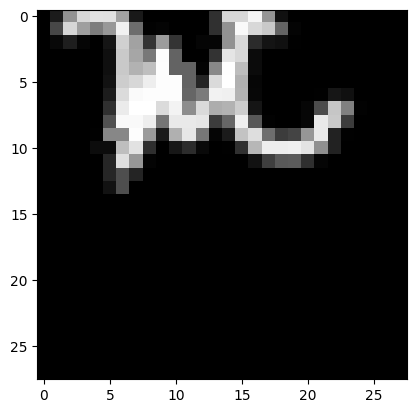

In [5]:
plt.imshow(images[0,0],cmap='gray')
print(classes[labels[0]])

In [6]:
device = torch.device("mps:0" if torch.mps.is_available() else "cpu")

In [7]:
lenet5 = lenet5.to(device)

In [8]:
loss = nn.CrossEntropyLoss()
optim = optim.Adam(lenet5.parameters(),lr=1e-3)

In [9]:
epochs = 25
train_loss_history = []
test_loss_history = []
train_accuracy_history = []
test_accuracy_history = []

for epoch in range(epochs):
    lenet5.train()
    sum_loss = 0
    sum_true_preds = 0
    for data,target in train_loader:
        optim.zero_grad()
        data,target = data.to(device),target.to(device)
        train_preds = lenet5(data)

        batch_loss = loss(train_preds,target)
        true_preds = (train_preds.argmax(dim=1) == target).sum().item()

        sum_true_preds+=true_preds
        sum_loss+=batch_loss.item()    
        batch_loss.backward()
        optim.step()
    
    train_epoch_loss = sum_loss/len(train_loader)
    train_loss_history.append(train_epoch_loss)

    train_epoch_accuracy = sum_true_preds/len(train_loader.dataset)
    train_accuracy_history.append(train_epoch_accuracy)

    lenet5.eval()
    sum_loss = 0
    sum_true_preds = 0
    with torch.no_grad():
        for data,target in test_loader:
            data,target = data.to(device),target.to(device)
            preds = lenet5(data)

            batch_loss = loss(preds,target)
            true_preds = (preds.argmax(dim=1) == target).sum().item()

            sum_loss+=batch_loss.item()
            sum_true_preds+=true_preds

        test_epoch_loss= sum_loss/len(test_loader)
        test_loss_history.append(test_epoch_loss)

        test_epoch_accuracy = sum_true_preds/len(test_loader.dataset)
        test_accuracy_history.append(test_epoch_accuracy)

    print(f"epoch: {epoch+1}")
    print(f"train loss: {train_epoch_loss}, train accuracy: {train_epoch_accuracy}, test loss: {test_epoch_loss}, test accuracy: {test_epoch_accuracy}")

        


epoch: 1
train loss: 2.979956791572964, train accuracy: 0.14203811369509045, test loss: 2.3718205374114367, test accuracy: 0.2858527131782946
epoch: 2
train loss: 1.8936500807398373, train accuracy: 0.42272286821705424, test loss: 1.5434886338759441, test accuracy: 0.5332687338501292
epoch: 3
train loss: 1.3662018947994585, train accuracy: 0.5714631782945736, test loss: 1.251672006383234, test accuracy: 0.6072351421188631
epoch: 4
train loss: 1.1026129962242757, train accuracy: 0.6443798449612403, test loss: 1.0015097248310945, test accuracy: 0.6740956072351422
epoch: 5
train loss: 0.9560342517095742, train accuracy: 0.686531007751938, test loss: 0.9198704982290462, test accuracy: 0.6989664082687338
epoch: 6
train loss: 0.8355236784699037, train accuracy: 0.7159237726098191, test loss: 0.8111796938643163, test accuracy: 0.7354651162790697
epoch: 7
train loss: 0.7727839897588357, train accuracy: 0.7337693798449613, test loss: 0.7285529016232004, test accuracy: 0.7548449612403101
epoch: 

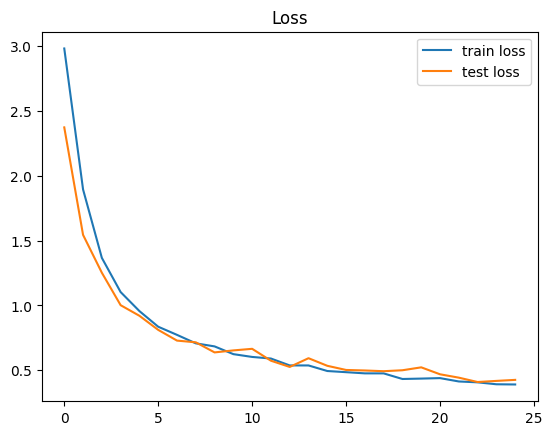

In [10]:
plt.plot(train_loss_history,label="train loss")
plt.plot(test_loss_history,label="test loss")
plt.legend(loc="upper right")
plt.title('Loss')
plt.show()

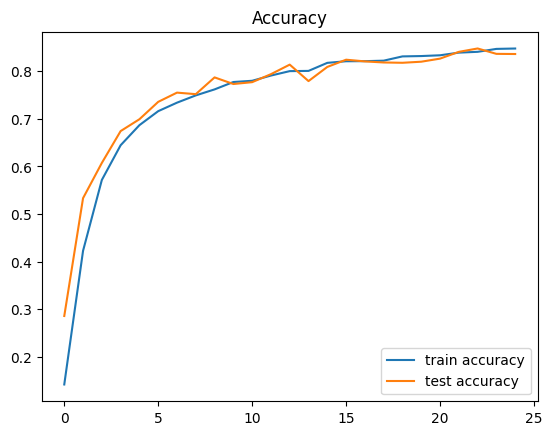

In [11]:
plt.plot(train_accuracy_history,label="train accuracy")
plt.plot(test_accuracy_history,label="test accuracy")
plt.legend(loc="lower right")
plt.title('Accuracy')
plt.show()

In [12]:
torch.save(lenet5.state_dict(),"lenet_weights.pth")